# Appendix B: Miscellaneous About Plotnine and Pysocviz

NOTE: This section isn't contained in the original book. This is a supplement for Python users.

In [1]:
from plotnine import *
from mizani.formatters import percent_format
from pysocviz.p9extra import scale_color_pander, scale_color_colorblind, scale_color_OkabeIto, scale_fill_OkabeIto
from pysocviz.loader import load_dataset
from gapminder import gapminder

## Changing of Default Font

`theme()` and some of the functions which have prefix `theme` (e.g., `theme_gray`, `theme_minimal`) can easily change the default font family. The following case, The font family is changed to "DejaVu Serif" whole the plot.  Of course, you can use fonts only which is installed in your system. If this font is not in your system, you need rewrite to the other name. (e.g., "Times", "Arial" and so on)

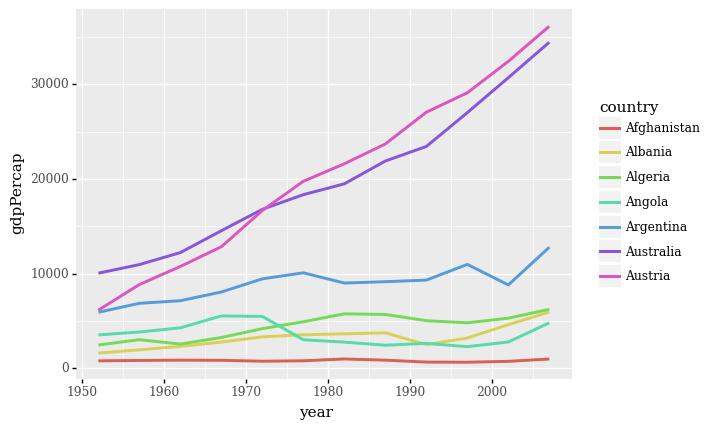

<ggplot: (8780129885687)>

In [2]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line(size=1.2)

p + theme(text=element_text(family='DejaVu Serif'))

Some of the theme functions have `base_family` argment. It can take a font family name.

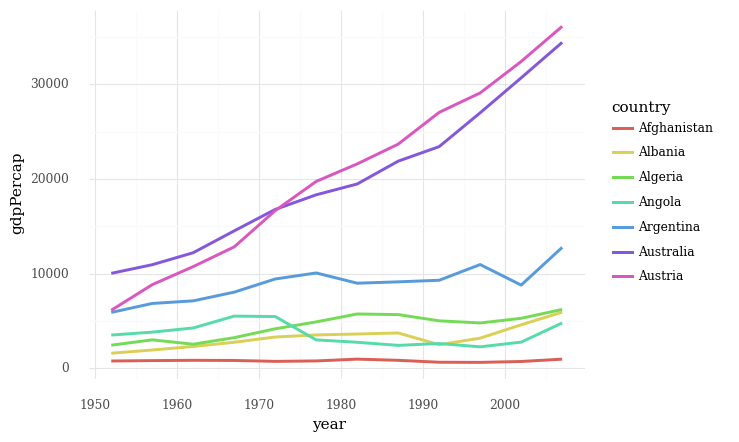

<ggplot: (8780129881811)>

In [3]:
p + theme_minimal(base_family='DejaVu Serif')

You can also set default font family (and other themeables) by `theme_set()`. This settings are valid whole the session.

In [4]:
theme_set(theme_minimal())

The 'DejaVu' font families have numerous gryphes but they don't support CJK (Chinses, Japanese and Korean) gryphes. If you want to use these languages, Which font family you need depends on your system. For example, In the following table, I show Japanese font family name which installed in three popular OS as default.

| OS         |Name (Sans-Serif Type)  |
|:-----------|:-----------------|
|Windows 10  |`Yu Gothic`       |
|Mac OS      |`Hiragino Sans`   |
|Ubuntu 20.40|`Noto Sans CJK JP`|

# Color Scaler Functions

## Comparison with ggplot2

In **plotnine**, `scale_color_brewer()` has more various color mappings than the original function in **ggplot2**. The list is [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). `scale_color_cmap()` and `scale_color_cmap_d()` can also take the same color mapping names. The former is for continuous scales, and the latter is for discrete/qualitative scales.

**plotnine** has also the other functions like `scale_color_distiller` and `scale_color_gradientn`.

## Categorical/Qualitative Color Mappings

I provide extra scale functions borrowed from **ggthemes** and **colorblindr** R packages. These are based on the concept of the "color universal design."

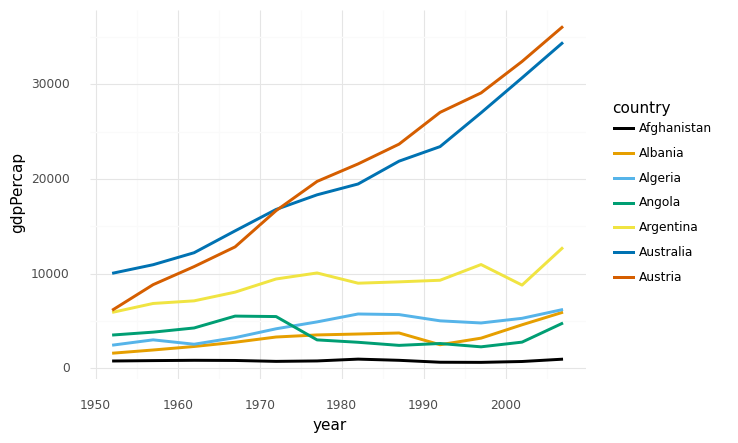

<ggplot: (8780129891154)>

In [5]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line(size=1.2)
p + scale_color_colorblind()

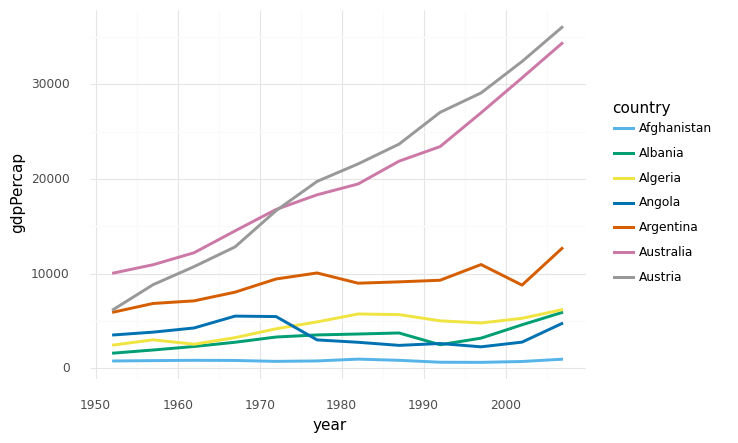

<ggplot: (8780113173191)>

In [6]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:7])],
    aes(x='year', y='gdpPercap', color='country', group='country')) + geom_line(size=1.2)
p + scale_color_pander()

Currently because of my laziness, These functions have only 8 colors. So If the number of group is more than 8, the Error happens. But `scale_*_OkabeIto` can customize the order and repeat the colors.

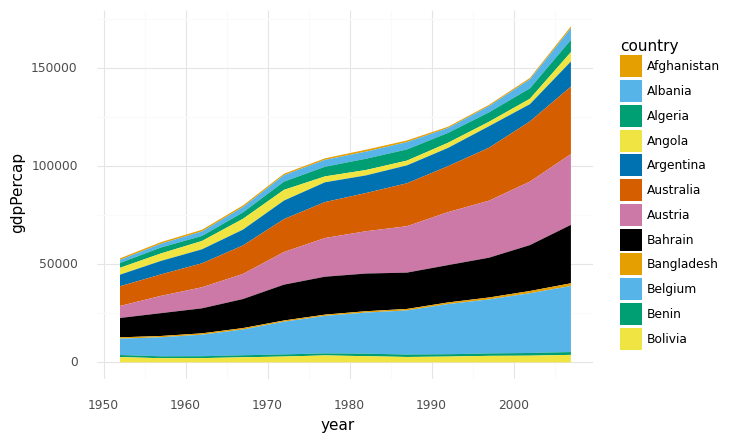

<ggplot: (8780113115808)>

In [7]:
p = ggplot(
    gapminder.loc[lambda d: d['country'].isin(gapminder['country'].unique()[:12])],
    aes(x='year', y='gdpPercap', fill='country', group='country')) + geom_area()
p + scale_fill_OkabeIto(order=list(range(8)) + list(range(4)))

## (WIP) Pareto Chart and Secondary Y-Axis

Currently plotnine doesn't support multiple axes. (see https://github.com/has2k1/plotnine/issues/68)

So it is difficult to draw a Pareto chart strictly.

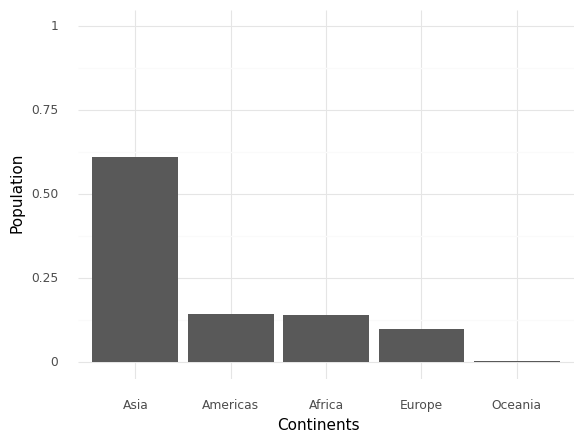

In [8]:
tmp = gapminder.loc[lambda d :d['year']==2002].groupby(
    'continent'
).sum().reset_index()
tmp['rate'] = tmp['pop']/tmp['pop'].sum()

p1 = ggplot(
    tmp,
    aes(x='reorder(continent, -pop)', y='rate')
) + geom_bar(stat='identity'
) + labs(x='Continents', y='Population'
) + coord_cartesian(ylim=[0, 1])
p1.draw();

In [9]:
tmp = tmp.sort_values('rate', ascending=False, ignore_index=True).assign(
    cumrate=lambda d: d['rate'].cumsum()
)

Normally, the both of scales varies but in the following plot, they don't  

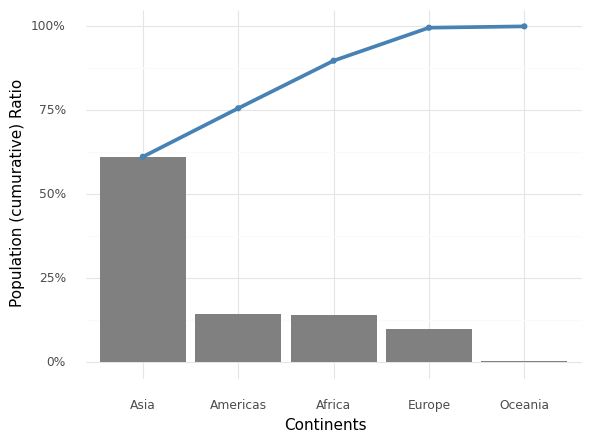

<ggplot: (8780110574126)>

In [10]:
p2 = ggplot(
    tmp, aes(x='reorder(continent, -pop)', y='cumrate')
) + geom_bar(aes(y='rate'), stat='identity', fill='gray'
) + geom_path(aes(group=1), color='steelblue', size=1.5
) + geom_point(color='steelblue', size=1.5
) + scale_y_continuous(labels=percent_format()
) + labs(x='Continents', y='Population (cumurative) Ratio')
p2